https://github.com/tensorflow/docs/blob/master/site/en/tutorials/eager/custom_training.ipynb

In [2]:
import tensorflow as tf

tf.enable_eager_execution()

### Define the model
Let's define a simple class to encapsulate the variables and the computation.

In [3]:
class Model(object):
  def __init__(self):
    # Initialize variable to (5.0, 0.0)
    # In practice, these should be initialized to random values.
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

Instructions for updating:
Colocations handled automatically by placer.


### Define a loss function
A loss function measures how well the output of a model for a given input matches the desired output. Let's use the standard L2 loss.

In [4]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

### Obtain training data

In [5]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

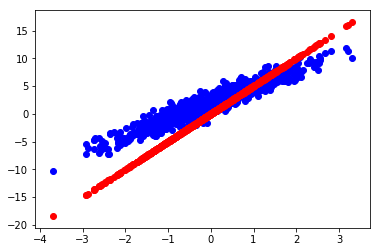

Current loss: 
9.713749


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

### Define a training loop
We now have our network and our training data. Let's train it, i.e., use the training data to update the model's variables (W and b) so that the loss goes down using gradient descent. 

In [9]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

In [10]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=5.00 b=0.00, loss=9.71375
Epoch  1: W=4.55 b=0.42, loss=6.39482
Epoch  2: W=4.21 b=0.74, loss=4.34772
Epoch  3: W=3.94 b=1.01, loss=3.08447
Epoch  4: W=3.73 b=1.22, loss=2.30456
Epoch  5: W=3.56 b=1.38, loss=1.82280
Epoch  6: W=3.44 b=1.51, loss=1.52506
Epoch  7: W=3.34 b=1.62, loss=1.34096
Epoch  8: W=3.26 b=1.70, loss=1.22705
Epoch  9: W=3.20 b=1.77, loss=1.15654


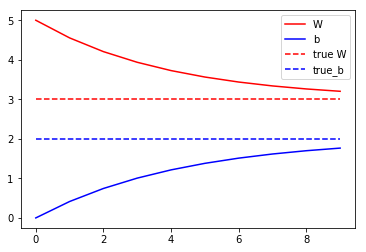

In [11]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()